In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import itertools as itr
import copy
from boundaries import WallBoundary, PressureBoundary, VelocityBoundary
from generators import WallGenerators
from simulation import Simulation
import pandas as pd
import random
from openpyxl import load_workbook

In [62]:
yResolution = random.randint(20,50)
xResolution = random.randint(20,50)
ACspeed = 1

walls = WallBoundary(yResolution, xResolution)
walls.borderWall()
conditions = walls.generateRoom()
walls.generateIndex()
walls.generateACDirections()
walls.indexPossibleACPos()

walls.possibleACIndex = walls.possibleACIndex[:-1]

[(2, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (2, 44), (3, 44), (4, 45), (4, 46), (4, 47), (5, 47), (6, 47), (7, 47), (8, 47), (9, 47), (9, 46), (9, 45), (9, 44), (10, 43), (11, 43), (12, 43), (13, 43), (14, 43), (15, 43), (16, 43), (17, 44), (17, 45), (17, 46), (17, 47), (18, 47), (19, 47), (20, 47), (21, 47), (22, 47), (23, 47), (24, 47), (25, 47), (25, 46), (25, 45), (25, 44), (25, 43), (25, 42), (25, 41), (25, 40), (25, 39), (25, 38), (25, 37), (25, 36), (25, 35), (25, 34), (25, 33), (25, 32), (25, 31), (25, 30), (25, 29), (25, 28), (25, 27), (25, 26), (25, 25), (25, 24), (25, 23), (25, 22), (25, 21), (25, 20), (25, 19), (25, 18), (25, 17), (25, 16), (25, 15), (

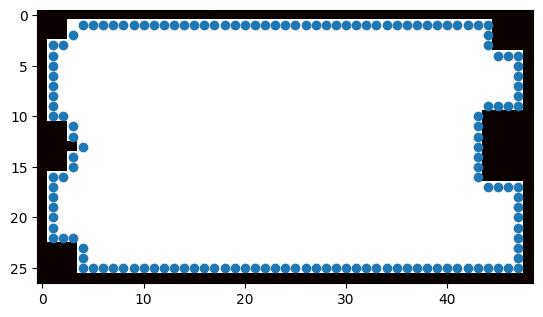

In [63]:
plt.imshow(walls.invertedBoundary, cmap="hot", interpolation="nearest")
plt.scatter([i[1] for i in walls.possibleACIndex], [i[0] for i in walls.possibleACIndex])
print(walls.possibleACIndex)

In [48]:
results = []
stables = []

In [49]:
def sim(pos):
    simTimes = []
    for directionIndex, direction in enumerate(WallBoundary.unitVect):
        #print(f"Trying direction: {direction}...")
        pathOfFlow = [i+j for i, j in zip(pos, direction)]
        if (not walls.boundary[pathOfFlow[0], pathOfFlow[1]]):
            velocityInlet = [VelocityBoundary(pos[0], pos[1], ACspeed, directionIndex)]
            initCondition = np.ones((yResolution, xResolution, Simulation.latticeSize)) / 9
            simulation = Simulation(
                yResolution, xResolution, initCondition, walls, velocityBoundaries=velocityInlet, pressureBoundaries=[]
            )
            simTime, stable = simulation.simulateUntilEquilibrium(equilibriumThreshold=2.5, limit = 500)
            #print("Done!")
            if stable and simTime < 500:
                #print("It exploded :() or didn't equalize")
                simTimes.append(simTime)
    return np.average(simTimes)

def bruteforce():
    bads = []
    for index, pos in enumerate(walls.possibleACIndex):
        print(pos)
        print(f"{index + 1}/{len(walls.possibleACIndex)}")
        result = sim(pos) #WE ARE GETTING THE TIME TO EQIL
        if (result > 0):
            results.append(result)
            stables.append(index)
        else:
            bads.append(index)
    print(bads)

In [50]:
bruteforce()

(2, 4)
1/80
(1, 5)
2/80


c:\Users\LENOVO\Documents\GitHub\AIBuilder-LatticeBoltzmann\simulation.py:52: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\AIBuilder-LatticeBoltzmann\simulation.py:53: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density
c:\Users\LENOVO\Documents\GitHub\AIBuilder-LatticeBoltzmann\simulation.py:71: RuntimeWarning: invalid value encountered in divide
  self.speedY = self.momentumY / self.density
c:\Users\LENOVO\Documents\GitHub\AIBuilder-LatticeBoltzmann\simulation.py:72: RuntimeWarning: invalid value encountered in divide
  self.speedX = self.momentumX / self.density


(1, 6)
3/80
(1, 7)
4/80
(1, 8)
5/80
(1, 9)
6/80
(1, 10)
7/80
(2, 11)
8/80
(3, 12)
9/80
(2, 13)
10/80
(1, 14)
11/80
(1, 15)
12/80
(1, 16)
13/80
(1, 17)
14/80
(1, 18)
15/80
(1, 19)
16/80
(1, 20)
17/80
(1, 21)
18/80
(2, 21)
19/80
(3, 22)
20/80
(3, 23)
21/80
(4, 23)
22/80
(5, 23)
23/80
(6, 23)
24/80
(7, 23)
25/80
(8, 23)
26/80
(9, 23)
27/80
(10, 23)
28/80
(11, 23)
29/80
(12, 23)
30/80
(13, 23)
31/80
(14, 23)
32/80
(15, 23)
33/80
(16, 23)
34/80
(17, 23)
35/80
(18, 23)
36/80
(19, 23)
37/80
(20, 23)
38/80
(21, 22)
39/80
(21, 21)
40/80
(21, 20)
41/80
(21, 19)
42/80
(21, 18)
43/80
(21, 17)
44/80
(21, 16)
45/80
(21, 15)
46/80
(21, 14)
47/80
(20, 13)
48/80
(19, 12)
49/80
(20, 11)
50/80
(21, 10)
51/80
(21, 9)
52/80
(21, 8)
53/80
(21, 7)
54/80
(21, 6)
55/80
(21, 5)
56/80
(21, 4)
57/80
(20, 4)
58/80
(19, 4)
59/80
(18, 3)
60/80
(18, 2)
61/80
(18, 1)
62/80
(17, 1)
63/80
(16, 1)
64/80
(15, 1)
65/80
(14, 1)
66/80
(14, 2)
67/80
(13, 3)
68/80
(12, 3)
69/80
(11, 3)
70/80
(10, 3)
71/80
(9, 3)
72/80
(8, 2)
7

In [51]:
print(results)
print(stables)

[30.25, 18.25, 18.25, 18.0, 17.75, 15.75, 18.333333333333332, 35.333333333333336, 74.2, 36.333333333333336, 18.333333333333332, 15.5, 15.5, 15.5, 18.0, 18.5, 18.75, 5.5, 31.75, 32.25, 31.5, 111.25, 22.666666666666668, 22.333333333333332, 22.0, 21.0, 19.666666666666668, 19.666666666666668, 19.333333333333332, 19.333333333333332, 19.666666666666668, 21.0, 21.666666666666668, 22.333333333333332, 23.0, 23.333333333333332, 23.666666666666668, 33.0, 6.0, 24.0, 23.666666666666668, 23.0, 19.0, 18.666666666666668, 19.333333333333332, 19.333333333333332, 25.0, 49.333333333333336, 99.83333333333333, 50.0, 25.0, 19.0, 19.333333333333332, 22.333333333333332, 22.666666666666668, 22.666666666666668, 6.0, 30.0, 30.25, 43.75, 23.333333333333332, 6.0, 19.0, 19.0, 18.25, 18.666666666666668, 17.5, 29.25, 28.5, 39.0, 29.0, 29.5, 18.25, 25.0, 68.2, 18.75, 19.25, 23.333333333333332, 19.25, 39.666666666666664]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2

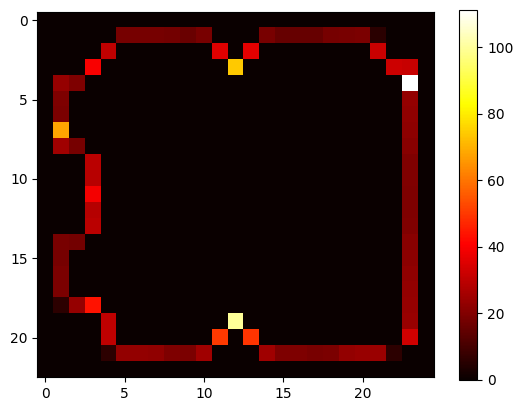

In [52]:
fig, ax = plt.subplots()

room = np.zeros((yResolution, xResolution))
for i in range(len(stables)):
    room[walls.possibleACIndex[stables[i]]] = results[i]

#init = np.append(init, export, axis=1)
#print(room)

heatmap  = ax.imshow(room, cmap="hot", interpolation="nearest")

fig.colorbar(heatmap)

In [53]:
lowest = min(results)
ansIndex = [index for index, result in zip(stables, results) if result == lowest]
ansPos = [walls.possibleACIndex[i] for i in ansIndex]
print(ansIndex)
print(ansPos)
print(list(zip(stables, results)))

[17]
[(1, 21)]
[(0, 30.25), (1, 18.25), (2, 18.25), (3, 18.0), (4, 17.75), (5, 15.75), (6, 18.333333333333332), (7, 35.333333333333336), (8, 74.2), (9, 36.333333333333336), (10, 18.333333333333332), (11, 15.5), (12, 15.5), (13, 15.5), (14, 18.0), (15, 18.5), (16, 18.75), (17, 5.5), (18, 31.75), (19, 32.25), (20, 31.5), (21, 111.25), (22, 22.666666666666668), (23, 22.333333333333332), (24, 22.0), (25, 21.0), (26, 19.666666666666668), (27, 19.666666666666668), (28, 19.333333333333332), (29, 19.333333333333332), (30, 19.666666666666668), (31, 21.0), (32, 21.666666666666668), (33, 22.333333333333332), (34, 23.0), (35, 23.333333333333332), (36, 23.666666666666668), (37, 33.0), (38, 6.0), (39, 24.0), (40, 23.666666666666668), (41, 23.0), (42, 19.0), (43, 18.666666666666668), (44, 19.333333333333332), (45, 19.333333333333332), (46, 25.0), (47, 49.333333333333336), (48, 99.83333333333333), (49, 50.0), (50, 25.0), (51, 19.0), (52, 19.333333333333332), (53, 22.333333333333332), (54, 22.666666666

In [54]:
def AI(model = "GD", a = 0.5, b1 = 0.9, b2 = 0.99, w = 0.004, e = 10 ** -5):
    print(f"Model : {model}")
    
    steps = 0
    worked = False
    
    startIndex = 0
    length = len(walls.possibleACIndex)
    visitedAll = np.zeros(length)
    wplus = w/a
    
    m = 0
    v = 0
    currentIndex = startIndex
    while True:
        steps += 1
        if (sum(visitedAll) == length): #Went through all positions
            break
        currentIndex = currentIndex % length
        visitedAll[currentIndex] = 1
        currentPos = walls.possibleACIndex[currentIndex]
        print(f"Pos: {currentIndex}")
        #print("Simulating at pos...")

        currentResults = np.round(sim(currentPos))
        print(currentResults)
        usable = currentResults > 10
        if (not usable):
            currentIndex -= 1
        else:
            # if (steps != 1):
            #     if (lastResult > currentResults and lastUsable):
            #         worked = True
            #         break

            forwardPos = walls.possibleACIndex[(currentIndex + 1) % length]
            forwardResults = np.round(sim(forwardPos))
            #print(forwardResults)
            forwardUsable = (forwardResults > 10)
            forwardDif = forwardResults - currentResults

            backwardPos = walls.possibleACIndex[(currentIndex - 1) % length] 
            backwardResults = np.round(sim(backwardPos))
            #print(backwardResults)
            backwardUsable = (backwardResults > 10)
            backwardDif = currentResults - backwardResults

            if (forwardDif > 0) and forwardUsable and backwardDif < 0 and backwardPos:
                worked = True
                break

            g = (forwardDif * forwardUsable) + (backwardDif * backwardUsable)
            print(g)
            
            if (model == "GD"):
                indexMove = a * g
            elif (model == "ADAM"):
                m = (b1 * m)  + ((1 - b1) * g)
                v = (b2 * v)  + ((1 - b2) * g * g)
                mc = m / (1 - (b1 ** steps) + e)
                vc = v / (1 - (b2 ** steps) + e)
                indexMove = a * mc / (np.sqrt(vc) + e)
            elif (model == "ADAMW"):
                g += (wplus * currentIndex)
                m = (b1 * m)  + ((1 - b1) * g)
                v = (b2 * v)  + ((1 - b2) * g * g)
                mc = m / (1 - (b1 ** steps) + e)
                vc = v / (1 - (b2 ** steps) + e)
                indexMove = a * mc / (np.sqrt(vc) + e)

            if (indexMove == 0):
                    indexMove = 1
            elif (np.abs(indexMove) < 1):
                #print("Gradient too small. Pushing...")
                indexMove = np.sign(indexMove)

            print(f"Move: {indexMove}")
            currentIndex = (currentIndex - int(np.round(indexMove)))

        lastResult = currentResults
        lastUsable = usable
        print()
    return worked, currentIndex, steps


In [55]:
# GDworked, GDindex, GDtime = AI(model="ADAM", a = 5)
# print("---------")
# print(GDworked)
# print(GDindex)
# print(walls.possibleACIndex[GDindex])